# Aim

Build and analyze a Kalman filter on real SEAL data, in particular to notch out the natural frequency at 17 Hz.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
from scipy.signal import welch, windows
from scipy.stats import normaltest, chi2
from matplotlib import pyplot as plt

In [29]:
import sys
sys.path.append("..")
from src.utils import genpsd
from src.observer import Observer
from src.fractal_deriv import te, design_filt, filt
rms = lambda data: np.sqrt(np.mean((data - np.mean(data)) ** 2))

In [4]:
ol = np.load("../data/bench/tt_center_noise/tt_center_noise_nsteps_10000_delay_0.01_dt_21_07_2021_12.npy")[:,0]

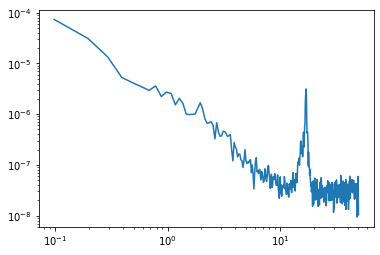

In [5]:
f, p = genpsd(ol, dt=0.01, nseg=8)
plt.loglog(f, p)

In [6]:
obs = Observer(f_sampling=100, time_id=20)
kfv = obs.make_kfilter_vibe(*obs.vibe_fit_freq(p)) # reset variances somehow
kft = obs.make_kfilter_ar(5, ol)
kf = kfv + kft

Solved discrete ARE.
Solved discrete ARE.
Solved discrete ARE.


In [7]:
random_timeseries = np.random.normal(np.mean(ol), np.std(ol), size=ol.shape)

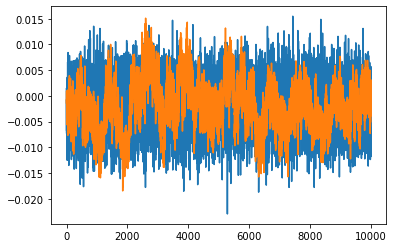

In [8]:
plt.plot(random_timeseries)
plt.plot(ol)

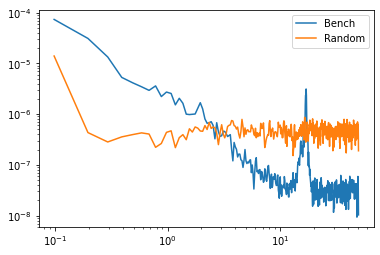

In [9]:
fr, pr = genpsd(random_timeseries, dt=0.01, nseg=8)
plt.loglog(f, p, label="Bench")
plt.loglog(fr, pr, label="Random")
plt.legend()

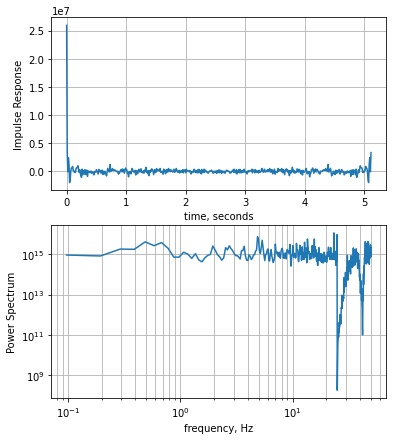

In [70]:
x = design_filt(dt=0.01, tf=1/p)

In [57]:
rms(ol[1000:])

0.004858569904830004

0.004155117049032819

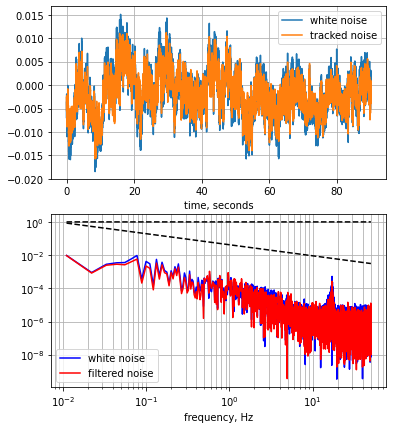

In [58]:
rms(filt(x, dt=0.01, u=ol[1000:]))

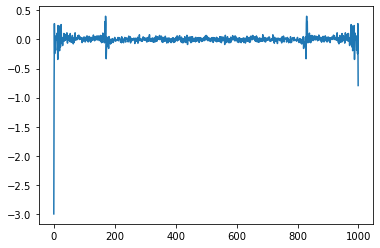

In [73]:
plt.plot(np.real(np.fft.fft(ol[:1000])))

In [66]:
f.shape

(512,)

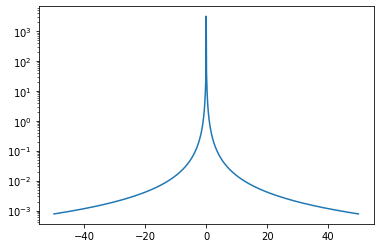

In [122]:
N = 1025
ft = (np.arange(N)-N//2)/(N * dt)
s = 1j*ft
xF = ((s+1e-6)**(-1/3)*(s+1e-1)**(-3/2))
plt.semilogy(ft, np.abs(xF))

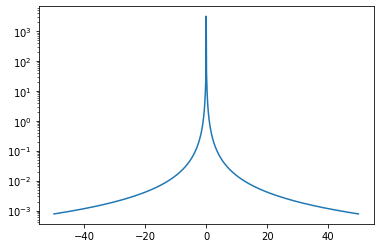

In [123]:
plt.semilogy(ft, np.abs(np.flip(xF)))

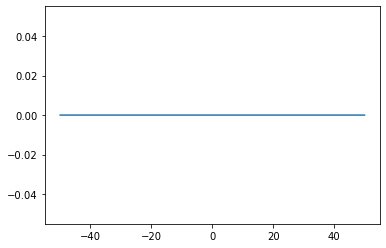

In [124]:
plt.plot(ft, np.abs(np.flip(xF)) - np.abs(xF))

In [139]:
ftest = np.fft.fftshift(np.fft.fftfreq(5))
vtest = np.random.randn(5)
fttest = np.fft.fft(vtest)
fttest

array([-1.09051718+0.j        ,  1.26717926+2.9930977j ,
       -1.5709468 -3.65711838j, -1.5709468 +3.65711838j,
        1.26717926-2.9930977j ])

In [130]:
help(np.fft.fftfreq)

Help on function fftfreq in module numpy.fft:

fftfreq(n, d=1.0)
    Return the Discrete Fourier Transform sample frequencies.
    
    The returned float array `f` contains the frequency bin centers in cycles
    per unit of the sample spacing (with zero at the start).  For instance, if
    the sample spacing is in seconds, then the frequency unit is cycles/second.
    
    Given a window length `n` and a sample spacing `d`::
    
      f = [0, 1, ...,   n/2-1,     -n/2, ..., -1] / (d*n)   if n is even
      f = [0, 1, ..., (n-1)/2, -(n-1)/2, ..., -1] / (d*n)   if n is odd
    
    Parameters
    ----------
    n : int
        Window length.
    d : scalar, optional
        Sample spacing (inverse of the sampling rate). Defaults to 1.
    
    Returns
    -------
    f : ndarray
        Array of length `n` containing the sample frequencies.
    
    Examples
    --------
    >>> signal = np.array([-2, 8, 6, 4, 1, 0, 3, 5], dtype=float)
    >>> fourier = np.fft.fft(signal)
    >>> n = 

In [143]:
ftest = np.array([0.0, 0.2, 0.4])
ftest = np.hstack((-np.flip(ftest[1:]), ftest))
ftest

array([-0.4, -0.2,  0. ,  0.2,  0.4])